## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

### 1.1 Load Dataset

In [4]:
# Load the dataset
df = pd.read_csv('/workspaces/final-project-adeydebor/data/spotify_streams_2024.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
df.head()

Dataset loaded successfully!
Shape: (4600, 29)
Columns: ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track']


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,Bent,Bent,41,8/4/2023,USUG12306666,"3,169",24.5,"104,897,425","27,545","20,350,869",...,246,1.0,223,NaN,"1,100,545","1,464",NaN,"616,738",NaN,1
1,Come and Say - Original Mix,Relyt Conections 3,"""XY""",11/14/2022,ES98I2200881,"2,379",29.2,NaN,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"ZEIT, DASS SICH WAS DREHT","ZEIT, DASS SICH WAS DREHT",$OHO BANI,2/23/2024,DEKF22400164,"3,291",23.9,"54,065,563","7,779","9,672,092",...,NaN,16.0,"9,108,102",16.0,NaN,NaN,NaN,"198,646",NaN,1
3,Us Vs Them,Us Vs. Them,$uicideboy$,3/29/2024,QZAPK2000499,"1,545",37.4,"44,027,794","7,604","6,627,187",...,NaN,2.0,250,7.0,"722,798",684,"2,377,642","103,487",NaN,1
4,"...And to Those I Love, Thanks for Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideboy$,2/14/2020,QZAPK1900020,"1,709",35.3,"675,082,623","167,727","15,198,984",...,NaN,5.0,"22,406",NaN,"11,746,442","31,117",NaN,"3,195,912",NaN,1


## 2. Data Cleaning and Preparation

### 2.1 Check Missing Values and Data Types

In [5]:
# Check data types and missing values
print("Data Types and Missing Values:")
print("="*50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{col:30} | {str(df[col].dtype):15} | Missing: {missing_count:4d} ({missing_pct:5.1f}%)")

Data Types and Missing Values:
Track                          | object          | Missing:    0 (  0.0%)
Album Name                     | object          | Missing:    0 (  0.0%)
Artist                         | object          | Missing:    5 (  0.1%)
Release Date                   | object          | Missing:    0 (  0.0%)
ISRC                           | object          | Missing:    0 (  0.0%)
All Time Rank                  | object          | Missing:    0 (  0.0%)
Track Score                    | float64         | Missing:    0 (  0.0%)
Spotify Streams                | object          | Missing:  113 (  2.5%)
Spotify Playlist Count         | object          | Missing:   70 (  1.5%)
Spotify Playlist Reach         | object          | Missing:   72 (  1.6%)
Spotify Popularity             | float64         | Missing:  804 ( 17.5%)
YouTube Views                  | object          | Missing:  308 (  6.7%)
YouTube Likes                  | object          | Missing:  315 (  6.8%)
TikTok 

In [13]:
# Clean Numeric Columns Stored as Strings

def clean_numeric_column(series):
    """
    Clean numeric columns that may contain commas, spaces, or other characters
    """
    if series.dtype == 'object':
        # Convert to string, remove commas, spaces, and handle 'nan'/'NaN' strings
        cleaned = series.astype(str).str.replace(',', '').str.replace(' ', '')
        # Replace string 'nan' with actual NaN
        cleaned = cleaned.replace(['nan', 'NaN', 'None', ''], np.nan)
        # Convert to numeric
        cleaned = pd.to_numeric(cleaned, errors='coerce')
        return cleaned
    return series

# List of columns that should be numeric (based on actual data)
numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 
    'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts', 'Amazon Playlist Count',
    'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Deezer Playlist Count',
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'All Time Rank', 'Track Score'
]

# Clean numeric columns
for col in numeric_columns:
    if col in df.columns:
        original_type = df[col].dtype
        df[col] = clean_numeric_column(df[col])
        print(f"Cleaned {col}: {original_type} -> {df[col].dtype}")

Cleaned Spotify Streams: float64 -> float64
Cleaned Spotify Playlist Count: float64 -> float64
Cleaned Spotify Playlist Reach: float64 -> float64
Cleaned Spotify Popularity: float64 -> float64
Cleaned YouTube Views: float64 -> float64
Cleaned YouTube Likes: float64 -> float64
Cleaned TikTok Posts: float64 -> float64
Cleaned TikTok Likes: float64 -> float64
Cleaned Apple Music Playlist Count: float64 -> float64
Cleaned TikTok Views: float64 -> float64
Cleaned YouTube Playlist Reach: float64 -> float64
Cleaned Shazam Counts: float64 -> float64
Cleaned Amazon Playlist Count: float64 -> float64
Cleaned AirPlay Spins: float64 -> float64
Cleaned SiriusXM Spins: float64 -> float64
Cleaned Deezer Playlist Reach: float64 -> float64
Cleaned Deezer Playlist Count: float64 -> float64
Cleaned Pandora Streams: float64 -> float64
Cleaned Pandora Track Stations: float64 -> float64
Cleaned Soundcloud Streams: float64 -> float64
Cleaned All Time Rank: object -> int64
Cleaned Track Score: float64 -> floa

### 2.2 Sample Data Inspection

In [9]:
# Look at a few sample rows to understand the data format
print("\nSample data for key columns:")
print("="*50)
sample_cols = ['Track', 'Artist', 'Spotify Streams', 'Spotify Playlist Count', 
               'YouTube Views', 'TikTok Posts', 'Release Date']
print(df[sample_cols].head(10))

print(f"\nFinal dataset after duplicate check: {len(df)} songs")


Sample data for key columns:
                                               Track       Artist  \
0                                               Bent           41   
1                        Come and Say - Original Mix         "XY"   
2                          ZEIT, DASS SICH WAS DREHT    $OHO BANI   
3                                         Us Vs Them  $uicideboy$   
4  ...And to Those I Love, Thanks for Sticking Ar...  $uicideboy$   
5                                        1000 Blunts  $uicideboy$   
6                     Not Even Ghosts Are This Empty  $uicideboy$   
7                                             Avalon  $uicideboy$   
8                                        Matte Black  $uicideboy$   
9  Are You Going to See the Rose in the Vase, or ...  $uicideboy$   

   Spotify Streams  Spotify Playlist Count  YouTube Views  TikTok Posts  \
0      104897425.0                 27545.0     13379053.0           NaN   
1              NaN                     1.0    415159148.0   

### 2.3 Duplicate Song Detection and Removal

In [10]:
# Check for potential duplicate songs (same track name, different releases)
print("\nChecking for potential duplicate songs:")
print("="*50)

# Find songs with same track name but different artists/details
duplicate_tracks = df[df.duplicated(subset=['Track'], keep=False)]

if len(duplicate_tracks) > 0:
    print(f"Found {len(duplicate_tracks)} potential duplicate track names")
    
    # Show examples of duplicates
    print("\nExamples of potential duplicates:")
    print("-" * 40)
    track_counts = duplicate_tracks['Track'].value_counts().head(10)
    for track, count in track_counts.items():
        print(f"'{track}': {count} versions")
        examples = duplicate_tracks[duplicate_tracks['Track'] == track][['Track', 'Artist', 'Spotify Streams']].head(3)
        for _, row in examples.iterrows():
            print(f"  - {row['Artist']}: {row['Spotify Streams']:,.0f} streams")
        print()
    
    # Strategy for handling duplicates
    print("Duplicate Handling Strategy:")
    print("- Keep songs with same name but different artists (likely different songs)")
    print("- Remove true duplicates: same track name AND same artist (keep highest streams)")
    
    # Remove true duplicates (same track + same artist, keep highest streams)
    print(f"\nRemoving true duplicates (same track name + same artist)...")
    initial_size = len(df)
    df = df.sort_values('Spotify Streams', ascending=False).drop_duplicates(subset=['Track', 'Artist'], keep='first')
    duplicates_removed = initial_size - len(df)
    print(f"Removed {duplicates_removed} true duplicate songs")
    print(f"Dataset size: {initial_size} -> {len(df)} songs")
else:
    print("No duplicate track names found")

print(f"\nFinal dataset after duplicate check: {len(df)} songs")


Checking for potential duplicate songs:
Found 411 potential duplicate track names

Examples of potential duplicates:
----------------------------------------
'Danza Kuduro - Cover': 13 versions
  - DJ MIX NON-STOP CHANNEL: 1,648,192,461 streams
  - LOVE BGM JPN: 1,645,079,292 streams
  - LOVE BGM JPN: 1,648,192,461 streams

'Cake By The Ocean - Cover': 9 versions
  - epi records: 1,614,203,949 streams
  - LOVE BGM JPN: 1,622,824,522 streams
  - LOVE BGM JPN: nan streams

'ýýýýýýýýýýýý': 7 versions
  - Aimer: 227,696,852 streams
  - ANNA ASTI: 17,080,355 streams
  - Hoshimachi Suisei: 21,255,074 streams

'ýýýýýý': 5 versions
  - SPRITE: 9,126,545 streams
  - WINE: 276,193 streams
  - YOASOBI: 84,848,838 streams

'Alone': 4 versions
  - Alan Walker: 738,909,649 streams
  - Burna Boy: 139,783,785 streams
  - Marshmello: 561,103,984 streams

'Flowers': 4 versions
  - Lauren Spencer Smith: 260,183,209 streams
  - Miley Cyrus: 2,031,280,633 streams
  - Miley Cyrus: 2,010,422,639 streams

'ý

## 3. Feature Engineering and Target Creation

### 3.1 Create Target Variable (Viral Success)

In [20]:
# Create viral success target based on Spotify Streams
# Using median as threshold - songs above median are considered "viral"
median_streams = df['Spotify Streams'].median()
df['viral'] = (df['Spotify Streams'] > median_streams).astype(int)

print(f"\nTarget Variable Creation:")
print(f"Viral threshold (median streams): {median_streams:,.0f}")
print(f"Viral songs: {df['viral'].sum():,} ({df['viral'].mean():.1%})")
print(f"Non-viral songs: {(df['viral']==0).sum():,} ({(df['viral']==0).mean():.1%})")

# Add streaming statistics
print(f"\nSpotify Streams Summary Statistics:")
print("="*45)
print(f"Minimum streams: {df['Spotify Streams'].min():,.0f}")
print(f"Maximum streams: {df['Spotify Streams'].max():,.0f}")
print(f"Mean streams: {df['Spotify Streams'].mean():,.0f}")
print(f"Standard deviation: {df['Spotify Streams'].std():,.0f}")

# Show top 5 most streamed songs
print(f"\nTop 5 Most Streamed Songs:")
print("="*40)
top_songs = df.nlargest(5, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]
for idx, row in top_songs.iterrows():
    print(f"{row['Track']} - {row['Artist']}: {row['Spotify Streams']:,.0f}")

# Show bottom 5 least streamed songs  
print(f"\nBottom 5 Least Streamed Songs:")
print("="*40)
bottom_songs = df.nsmallest(5, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]
for idx, row in bottom_songs.iterrows():
    print(f"{row['Track']} - {row['Artist']}: {row['Spotify Streams']:,.0f}")


Target Variable Creation:
Viral threshold (median streams): 231,981,539
Viral songs: 2,194 (48.9%)
Non-viral songs: 2,294 (51.1%)

Spotify Streams Summary Statistics:
Minimum streams: 1,071
Maximum streams: 4,281,468,720
Mean streams: 433,529,955
Standard deviation: 523,804,746

Top 5 Most Streamed Songs:
Blinding Lights - The Weeknd: 4,281,468,720
Blinding Lights - xSyborg: 4,261,328,190
Shape of You - Ed Sheeran: 3,909,458,734
Shape of You - xSyborg: 3,888,356,417
Someone You Loved - Lewis Capaldi: 3,427,498,835

Bottom 5 Least Streamed Songs:
Poor People We - Harp and a monkey: 1,071
6. A.M. - Azul: 1,186
Numero Uno - Dan-E-MC: 1,224
No Fuss - Zeme Libre: 1,332
Very Cute Melody by Marimba Tone (39813) - mitsu sound: 1,384


### 3.2 Create Time-Based Features

In [21]:
# Convert release date to datetime and extract features
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month

# Calculate days since release (using a collection date)
collection_date = pd.to_datetime('2024-12-31')  # Adjust based on your data
df['Days Since Release'] = (collection_date - df['Release Date']).dt.days

print(f"\nTime-based features created:")
print(f"Release year range: {df['Release Year'].min():.0f} - {df['Release Year'].max():.0f}")
print(f"Days since release range: {df['Days Since Release'].min():.0f} - {df['Days Since Release'].max():.0f}")


Time-based features created:
Release year range: 1987 - 2024
Days since release range: 200 - 13678


### 3.4 Drop Unnecessary Columns and Handle Missing Values

In [22]:
# Drop columns not needed + focus on major platforms
columns_to_drop = [
    'ISRC', 'Album Name', 'TIDAL Popularity',  # not needed + 100% missing
    # Focus on major platforms: Spotify, YouTube, TikTok, Apple Music, Shazam
    # Exclude smaller/niche platforms
    'Amazon Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 
    'Deezer Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'
]

# Check which columns actually exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
print(f"\nExcluding columns to focus on major platforms:")
for col in existing_columns_to_drop:
    if col in df.columns:
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        reason = "100% missing" if col == 'TIDAL Popularity' else "Not needed" if col in ['ISRC', 'Album Name'] else "Focus on major platforms"
        print(f"  - {col}: {reason}")

# Drop the columns
df = df.drop(columns=existing_columns_to_drop)

# Keep Track and Artist for labeling but don't use in modeling
identifier_columns = ['Track', 'Artist']

# Display final column list and missing value summary
print(f"\nFinal dataset columns ({len(df.columns)} total) - Major Platforms Focus:")
print("="*75)
print(f"{'Column Name':<30} {'Missing Count':<12} {'Missing %':<10} {'Platform'}")
print("-" * 75)

# Categorize columns by platform for clarity
platform_map = {
    'Spotify': ['Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Streams'],
    'YouTube': ['YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach'],
    'TikTok': ['TikTok Posts', 'TikTok Likes', 'TikTok Views'],
    'Apple Music': ['Apple Music Playlist Count'],
    'Shazam': ['Shazam Counts'],
    'General': [ 'Explicit Track', 'Days Since Release', 'All Time Rank', 'Track Score', 'viral'],
    'Identifiers': ['Track', 'Artist', 'Release Date']
}

for platform, cols in platform_map.items():
    for col in cols:
        if col in df.columns and col not in identifier_columns:
            missing_count = df[col].isnull().sum()
            missing_pct = (missing_count / len(df)) * 100
            print(f"{col:<30} {missing_count:<12} {missing_pct:<10.1f} {platform}")

print(f"\nFinal dataset shape: {df.shape}")
print("✓ Focused on major music platforms: Spotify, YouTube, TikTok, Apple Music, Shazam")

# Check missing values after cleaning
print("\nMissing values summary after platform focus:")
print("="*50)
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

# Display with percentages
for col, count in missing_summary.items():
    missing_pct = (count / len(df)) * 100
    print(f"{col:30}: {count:4d} ({missing_pct:5.1f}%)")


Excluding columns to focus on major platforms:

Final dataset columns (22 total) - Major Platforms Focus:
Column Name                    Missing Count Missing %  Platform
---------------------------------------------------------------------------
Spotify Popularity             743          16.6       Spotify
Spotify Playlist Count         55           1.2        Spotify
Spotify Playlist Reach         57           1.3        Spotify
Spotify Streams                99           2.2        Spotify
YouTube Views                  253          5.6        YouTube
YouTube Likes                  260          5.8        YouTube
YouTube Playlist Reach         950          21.2       YouTube
TikTok Posts                   1092         24.3       TikTok
TikTok Likes                   904          20.1       TikTok
TikTok Views                   905          20.2       TikTok
Apple Music Playlist Count     516          11.5       Apple Music
Shazam Counts                  497          11.1       Sha

In [24]:
# Display final column list and missing value summary
print(f"\nFinal dataset columns ({len(df.columns)} total):")
print("="*65)
print(f"{'Column Name':<30} {'Missing Count':<12} {'Missing %':<10} {'Status'}")
print("-" * 65)

# Categorize columns by missing percentage for clarity
for col in sorted(df.columns):
    if col not in identifier_columns and col != 'viral':
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100
        
        # Categorize by missing percentage
        if missing_pct == 0:
            status = "Complete"
        elif missing_pct < 10:
            status = "Excellent"
        elif missing_pct < 20:
            status = "Good"
        elif missing_pct < 30:
            status = "Acceptable*"  # * indicates imputation needed
        else:
            status = "Poor"
            
        print(f"{col:<30} {missing_count:<12} {missing_pct:<10.1f} {status}")

print(f"\nFinal dataset shape: {df.shape}")
print("* 'Acceptable' columns (20-30% missing) will be imputed - interpret results cautiously")
print("Note: TikTok and YouTube metrics kept despite 20-25% missing due to importance for virality analysis")


Final dataset columns (22 total):
Column Name                    Missing Count Missing %  Status
-----------------------------------------------------------------
All Time Rank                  0            0.0        Complete
Apple Music Playlist Count     516          11.5       Good
Days Since Release             0            0.0        Complete
Explicit Track                 0            0.0        Complete
Release Date                   0            0.0        Complete
Release Month                  0            0.0        Complete
Release Year                   0            0.0        Complete
Shazam Counts                  497          11.1       Good
Spotify Playlist Count         55           1.2        Excellent
Spotify Playlist Reach         57           1.3        Excellent
Spotify Popularity             743          16.6       Good
Spotify Streams                99           2.2        Excellent
TikTok Likes                   904          20.1       Acceptable*
TikTok Pos

## 4. Exploratory Data Analysis

### 4.1 Target Variable Distribution

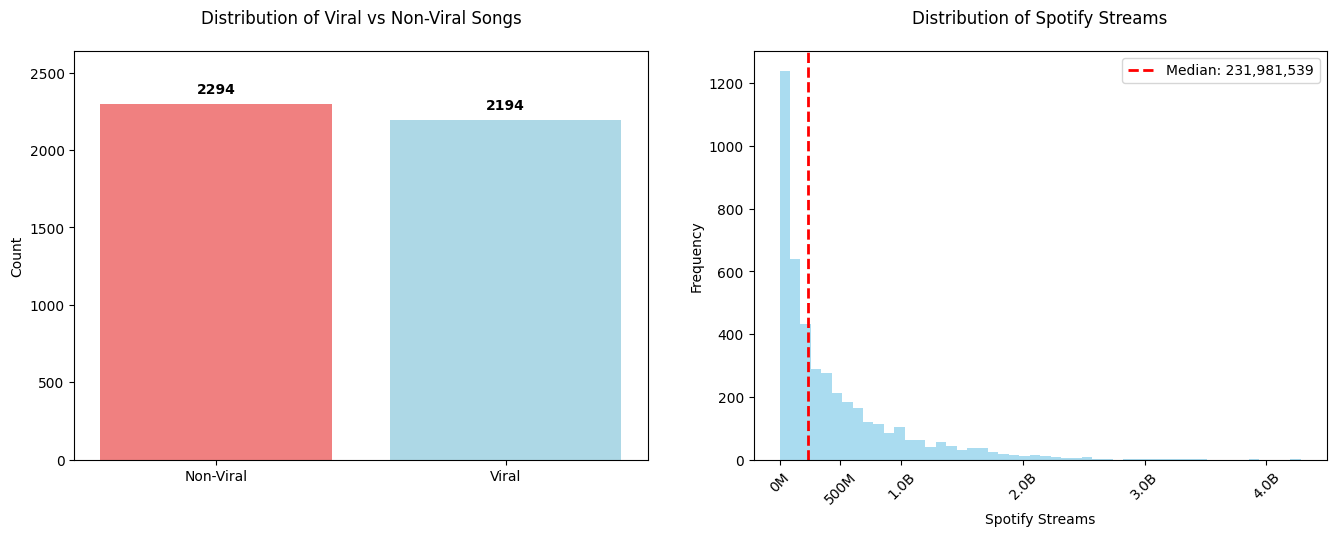

In [18]:
plt.figure(figsize=(14, 6))

# Subplot 1: Viral vs Non-viral counts
plt.subplot(1, 2, 1)
viral_counts = df['viral'].value_counts()
bars = plt.bar(['Non-Viral', 'Viral'], viral_counts.values, color=['lightcoral', 'lightblue'])
plt.title('Distribution of Viral vs Non-Viral Songs', pad=20)
plt.ylabel('Count')
# Add value labels on bars
for i, v in enumerate(viral_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
# Add some padding to y-axis
plt.ylim(0, max(viral_counts.values) * 1.15)

# Subplot 2: Spotify Streams distribution with median line
plt.subplot(1, 2, 2)
plt.hist(df['Spotify Streams'].dropna(), bins=50, alpha=0.7, color='skyblue')
plt.axvline(median_streams, color='red', linestyle='--', linewidth=2, label=f'Median: {median_streams:,.0f}')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Spotify Streams', pad=20)
plt.legend()

# Smart formatter: show millions (M) for < 1B, billions (B) for >= 1B
def smart_format(x, p):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    else:
        return f'{x/1e6:.0f}M'

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(smart_format))

# Set fewer, well-spaced x-axis tick points for better readability
max_streams = df['Spotify Streams'].max()
tick_positions = [0, 500e6, 1e9, 2e9, 3e9, 4e9]
# Only use ticks that are within our data range
tick_positions = [tick for tick in tick_positions if tick <= max_streams * 1.1]
ax.set_xticks(tick_positions)

# Rotate labels to prevent overlap
plt.xticks(rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

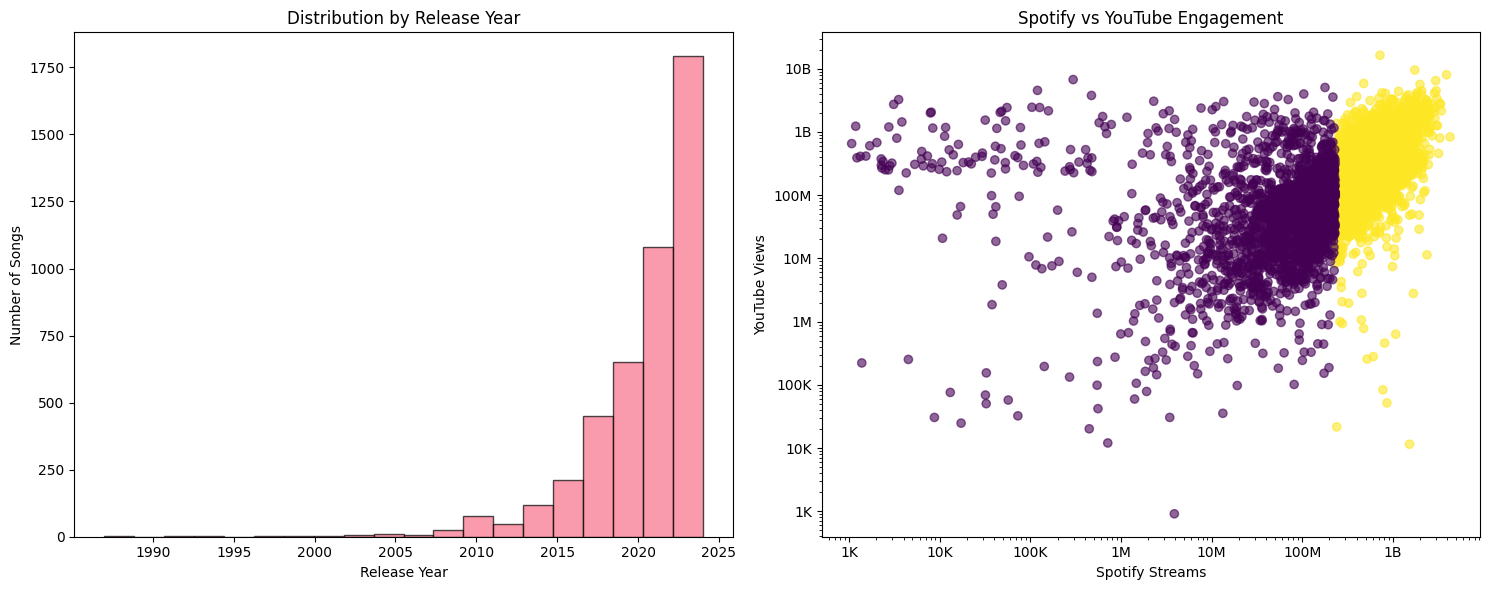

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Release year distribution (this one is fine as-is)
axes[0].hist(df['Release Year'].dropna(), bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution by Release Year')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Songs')

# Cross-platform engagement with log scale and readable labels
mask = (df['Spotify Streams'].notna()) & (df['YouTube Views'].notna()) & \
       (df['Spotify Streams'] > 0) & (df['YouTube Views'] > 0)

axes[1].scatter(df.loc[mask, 'Spotify Streams'], 
                df.loc[mask, 'YouTube Views'], 
                alpha=0.6, c=df.loc[mask, 'viral'], cmap='viridis')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title('Spotify vs YouTube Engagement')
axes[1].set_xlabel('Spotify Streams')
axes[1].set_ylabel('YouTube Views')

# Add readable tick labels
def format_ticks(x, p):
    if x >= 1e9:
        return f'{x/1e9:.0f}B'
    elif x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

axes[1].xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

plt.tight_layout()
plt.show()

### 4.2 Feature Distributions by Viral Status

Features selected for analysis: ['Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts', 'Track Score']


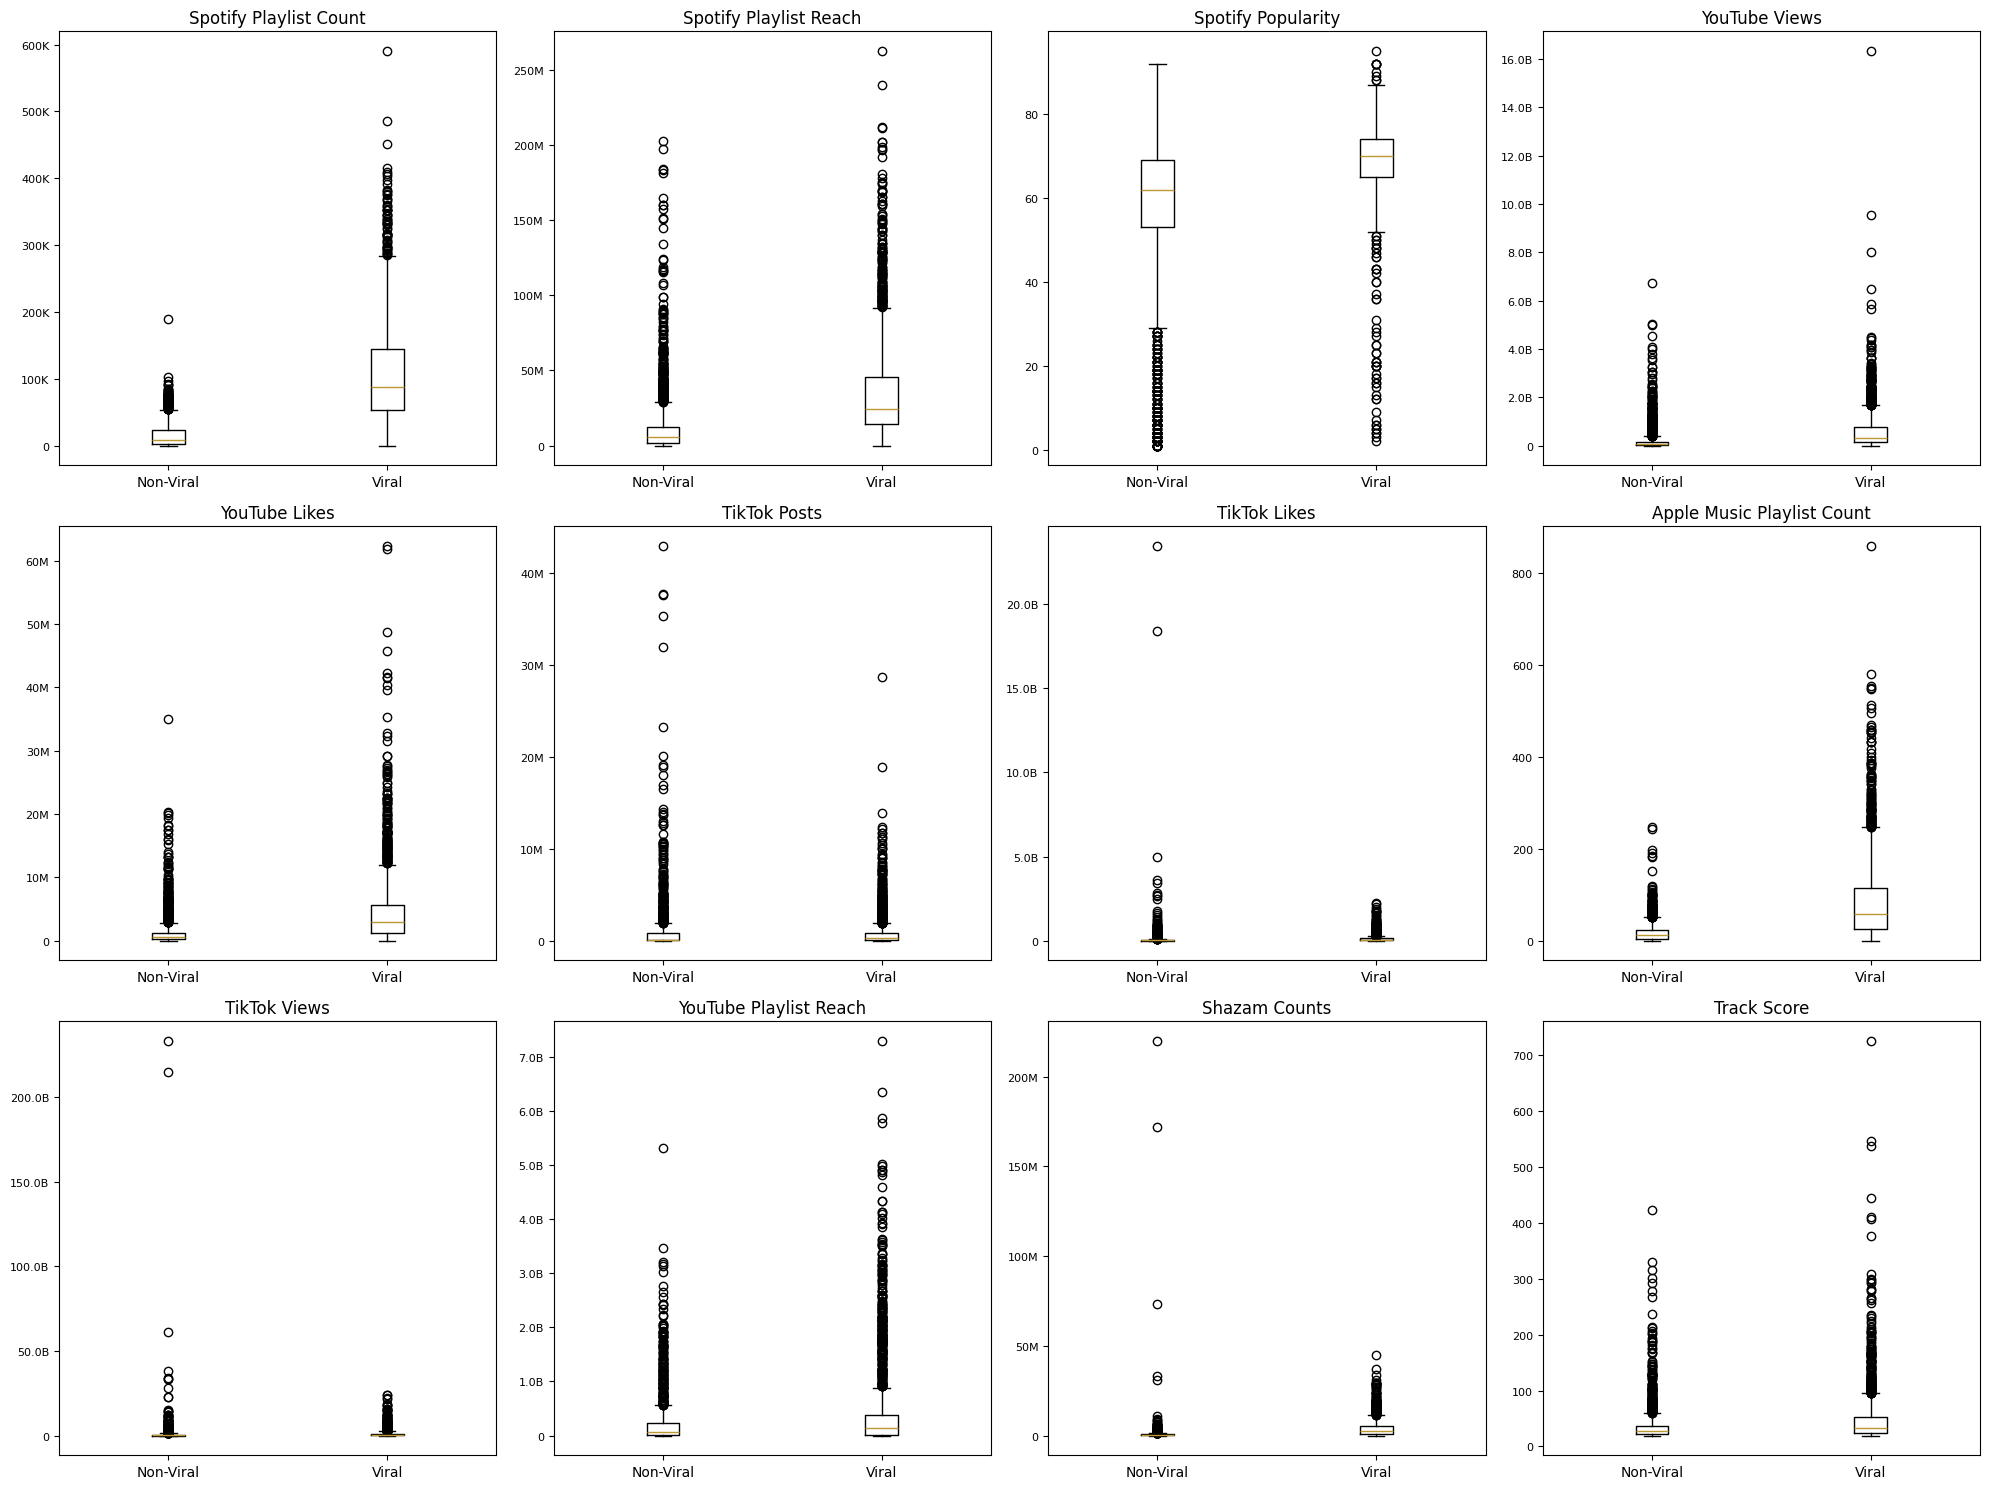

In [41]:
# Select key features for analysis (focusing on features with reasonable data availability)
# Note: Spotify Streams excluded as it was used to create the target variable
feature_columns = [
    'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 
    'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts', 'Track Score'
]

# Only include features that actually exist in the dataset
feature_columns = [col for col in feature_columns if col in df.columns]
print(f"Features selected for analysis: {feature_columns}")

# Create comparison plots for features with <30% missing values
valid_features = []
for col in feature_columns:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    if missing_pct < 30:  # Only use features with <30% missing
        valid_features.append(col)
    else:
        print(f"Skipping {col} due to {missing_pct:.1f}% missing values")

feature_columns = valid_features

# Create comparison plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Helper function to format large numbers
def format_axis_labels(ax, values):
    """Format axis labels to show K, M, B instead of scientific notation"""
    def smart_format_axis(x, p):
        if abs(x) >= 1e9:
            return f'{x/1e9:.1f}B'
        elif abs(x) >= 1e6:
            return f'{x/1e6:.0f}M'
        elif abs(x) >= 1e3:
            return f'{x/1e3:.0f}K'
        else:
            return f'{x:.0f}'
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(smart_format_axis))

for i, col in enumerate(feature_columns):
    if col in df.columns and i < len(axes):
        # Create box plots comparing viral vs non-viral
        viral_data = df[df['viral'] == 1][col].dropna()
        non_viral_data = df[df['viral'] == 0][col].dropna()
        
        box_plot = axes[i].boxplot([non_viral_data, viral_data], labels=['Non-Viral', 'Viral'])
        axes[i].set_title(f'{col}')
        axes[i].tick_params(axis='y', labelsize=8)
        
        # Format y-axis labels to be readable
        format_axis_labels(axes[i], pd.concat([viral_data, non_viral_data]))

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.3 Correlation Analysis

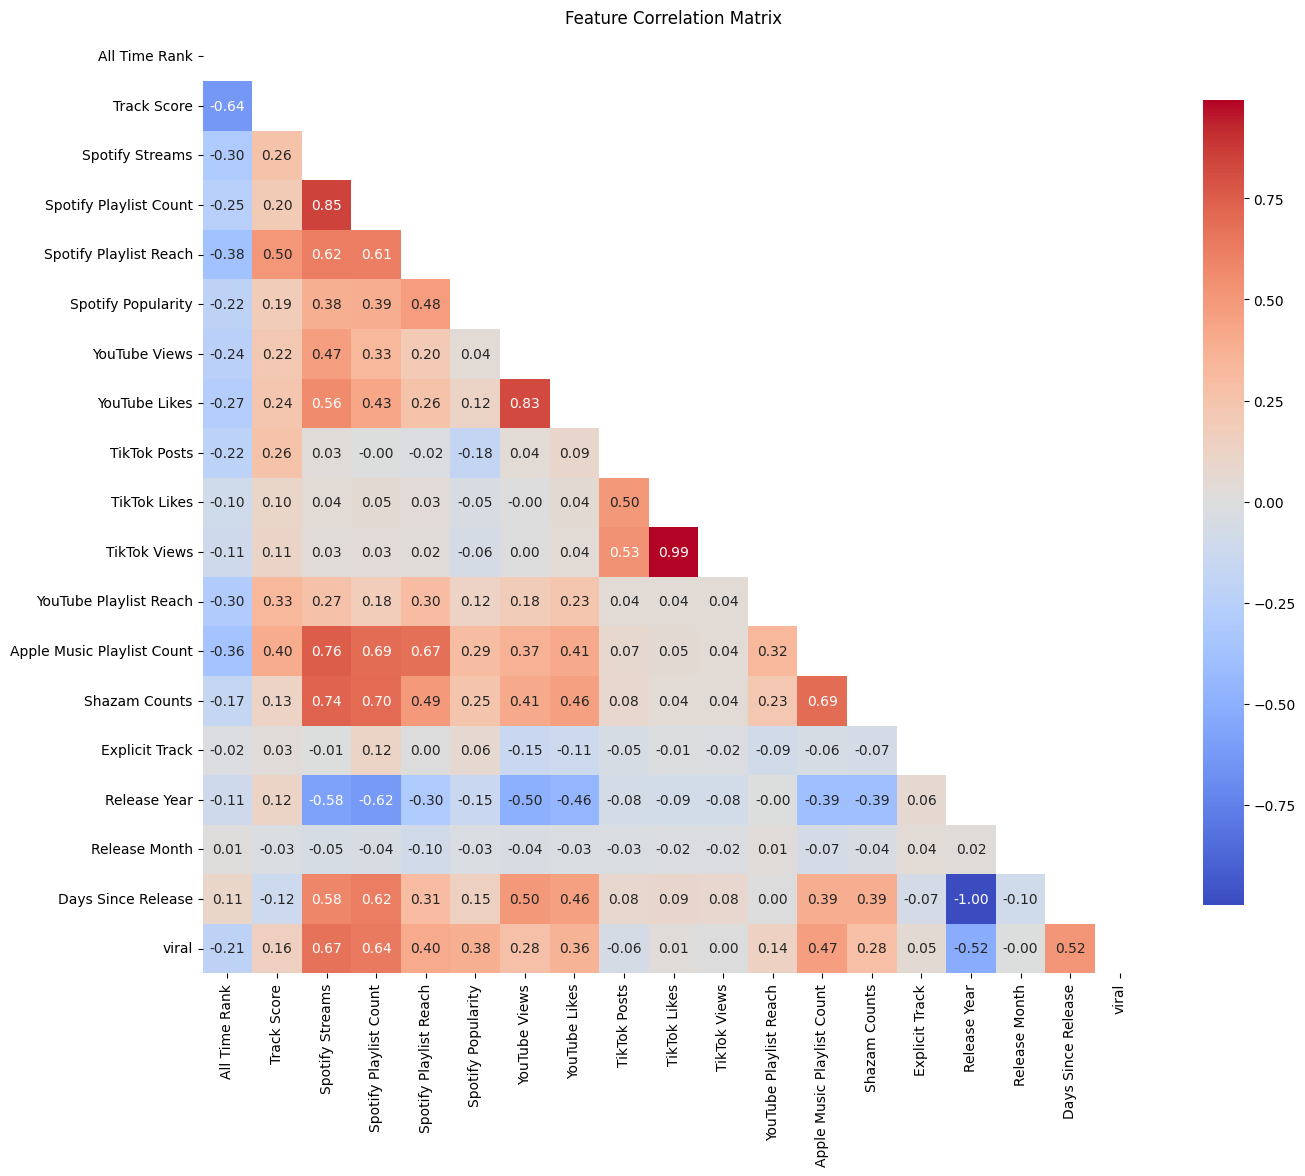

Correlations with Viral status:
Spotify Streams               :  0.669
Spotify Playlist Count        :  0.642
Release Year                  : -0.519
Days Since Release            :  0.517
Apple Music Playlist Count    :  0.466
Spotify Playlist Reach        :  0.402
Spotify Popularity            :  0.382
YouTube Likes                 :  0.359
Shazam Counts                 :  0.282
YouTube Views                 :  0.277
All Time Rank                 : -0.213
Track Score                   :  0.157
YouTube Playlist Reach        :  0.143
TikTok Posts                  : -0.061
Explicit Track                :  0.045
TikTok Likes                  :  0.014
Release Month                 : -0.003
TikTok Views                  :  0.000


In [42]:
# Select numeric columns for correlation analysis
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target variable and identifier columns
numeric_features = [col for col in numeric_features if col not in ['viral'] + identifier_columns]

# Calculate correlation matrix
correlation_matrix = df[numeric_features + ['viral']].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_correlations = correlation_matrix['viral'].drop('viral').sort_values(key=abs, ascending=False)
print("Correlations with Viral status:")
print("="*35)
for feature, corr in target_correlations.items():
    print(f"{feature:30}: {corr:6.3f}")

### 4.4 Address Multicollinearity

In [44]:
# Create working copy of feature list for cleaning
feature_columns_clean = feature_columns.copy()

# ADD the missing features that should be included
additional_features = ['Days Since Release', 'Explicit Track', 'All Time Rank']
for feat in additional_features:
    if feat not in feature_columns_clean:
        feature_columns_clean.append(feat)
        print(f"Added '{feat}' to feature set")

# Check for problematic multicollinearity (correlation > 0.8)
print("\nMulticollinearity Check (correlation > 0.8):")
print("="*45)

# Remove highly correlated feature pairs based on correlation matrix analysis
# Note: Ignoring correlations with Spotify Streams since it won't be used in modeling
correlations_to_check = [
    ('TikTok Views', 'TikTok Likes', 0.99, 'TikTok Views'),  # Remove Views (keep Likes )
    ('YouTube Views', 'YouTube Likes', 0.83, 'YouTube Likes')  # Remove Likes (keep Views)
]

for feat1, feat2, corr, remove_feature in correlations_to_check:
    if feat1 in feature_columns_clean and feat2 in feature_columns_clean:
        feature_columns_clean.remove(remove_feature)
        keep_feature = feat1 if remove_feature == feat2 else feat2
        print(f"Removed '{remove_feature}' due to high correlation with '{keep_feature}' (r={corr:.2f})")
    elif feat1 not in feature_columns_clean or feat2 not in feature_columns_clean:
        missing_feat = feat1 if feat1 not in feature_columns_clean else feat2
        print(f"'{missing_feat}' already excluded from feature set")

print("Other feature correlations are within acceptable range for modeling")
print("Note: Spotify Streams correlations ignored since it won't be used as a predictor")

print(f"\nFinal features for modeling ({len(feature_columns_clean)} total):")
for i, feat in enumerate(feature_columns_clean, 1):
    print(f"  {i:2d}. {feat}")

Added 'Days Since Release' to feature set
Added 'Explicit Track' to feature set
Added 'All Time Rank' to feature set

Multicollinearity Check (correlation > 0.8):
Removed 'TikTok Views' due to high correlation with 'TikTok Likes' (r=0.99)
Removed 'YouTube Likes' due to high correlation with 'YouTube Views' (r=0.83)
Other feature correlations are within acceptable range for modeling
Note: Spotify Streams correlations ignored since it won't be used as a predictor

Final features for modeling (13 total):
   1. Spotify Playlist Count
   2. Spotify Playlist Reach
   3. Spotify Popularity
   4. YouTube Views
   5. TikTok Posts
   6. TikTok Likes
   7. Apple Music Playlist Count
   8. YouTube Playlist Reach
   9. Shazam Counts
  10. Track Score
  11. Days Since Release
  12. Explicit Track
  13. All Time Rank


### 4.5 Summary Statistics Table

In [49]:
# Create Table 1: Descriptive Statistics for Final Features
print("\n" + "="*80)
print("TABLE 1: DESCRIPTIVE STATISTICS FOR MODELING FEATURES")
print("="*80)

# Calculate statistics for clean features only
final_stats = []
for feature in feature_columns_clean:
    if feature in df.columns:
        stats = {
            'Feature': feature,
            'Count': df[feature].notna().sum(),
            'Missing (%)': (df[feature].isnull().sum() / len(df)) * 100,
            'Mean': df[feature].mean() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Std': df[feature].std() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Min': df[feature].min() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Max': df[feature].max() if df[feature].dtype in ['float64', 'int64'] else 'N/A'
        }
        final_stats.append(stats)

# Create and display the table
import pandas as pd
stats_df = pd.DataFrame(final_stats)

print(f"{'Feature':<30} {'Count':<6} {'Missing%':<8} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
print("-" * 100)

for _, row in stats_df.iterrows():
    feature_name = row['Feature'][:29]  # Truncate if too long
    count = f"{row['Count']}"
    missing = f"{row['Missing (%)']:.1f}%"
    
    if row['Mean'] != 'N/A':
        mean = f"{row['Mean']:,.0f}" if row['Mean'] >= 1 else f"{row['Mean']:.3f}"
        std = f"{row['Std']:,.0f}" if row['Std'] >= 1 else f"{row['Std']:.3f}"
        min_val = f"{row['Min']:,.0f}" if row['Min'] >= 1 else f"{row['Min']:.3f}"
        max_val = f"{row['Max']:,.0f}" if row['Max'] >= 1 else f"{row['Max']:.3f}"
    else:
        mean = std = min_val = max_val = "N/A"
    
    print(f"{feature_name:<30} {count:<6} {missing:<8} {mean:<12} {std:<12} {min_val:<12} {max_val:<12}")

print("\nNote: Statistics shown after data cleaning and before imputation")
print("Features selected based on platform importance and multicollinearity analysis")


TABLE 1: DESCRIPTIVE STATISTICS FOR MODELING FEATURES
Feature                        Count  Missing% Mean         Std          Min          Max         
----------------------------------------------------------------------------------------------------
Spotify Playlist Count         4433   1.2%     59,785       70,787       1            590,392     
Spotify Playlist Reach         4431   1.3%     23,456,253   29,542,687   1            262,343,414 
Spotify Popularity             3745   16.6%    64           16           1            95          
YouTube Views                  4235   5.6%     395,892,159  689,590,974  913          16,322,756,555
TikTok Posts                   3396   24.3%    937,695      2,432,557    1            42,900,000  
TikTok Likes                   3584   20.1%    111,340,607  550,652,515  3            23,474,223,833
Apple Music Playlist Count     3972   11.5%    54           71           1            859         
YouTube Playlist Reach         3538   21.2%    3

## 5. Feature Engineering and Preparation

### 5.1 Handle Missing Values Strategy
Use median imputation; median is robust to outliers and preserves distribution center

In [50]:
# Analyze missing value patterns and create imputation tracking
print("Missing Value Analysis and Imputation Strategy:")
print("="*60)
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': [df[col].isnull().sum() for col in df.columns],
    'Missing_Percentage': [(df[col].isnull().sum() / len(df)) * 100 for col in df.columns]
}).sort_values('Missing_Percentage', ascending=False)

# Show only columns with missing values
missing_data = missing_analysis[missing_analysis['Missing_Percentage'] > 0]
print(missing_data.to_string(index=False))

# Strategy for handling missing values:
print(f"\nImputation Strategy:")
print("• 0% missing: No action needed")
print("• 1-10% missing: Median imputation (minimal impact)")
print("• 10-20% missing: Median imputation (document in results)")
print("• 20-30% missing: Median imputation (interpret cautiously - major platforms only)")

# Track which features will be imputed for reporting
imputation_log = {}

# Fill missing values with median for numeric columns (conservative approach)
for col in feature_columns_clean:
    if col in df.columns and df[col].isnull().sum() > 0:
        original_missing = df[col].isnull().sum()
        missing_pct = (original_missing / len(df)) * 100
        
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            imputation_log[col] = {'count': original_missing, 'percentage': missing_pct, 'method': 'median', 'value': median_val}
            print(f"Imputed {col}: {original_missing} values ({missing_pct:.1f}%) with median: {median_val}")
        else:
            mode_val = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 0
            df[col].fillna(mode_val, inplace=True)
            imputation_log[col] = {'count': original_missing, 'percentage': missing_pct, 'method': 'mode', 'value': mode_val}
            print(f"Imputed {col}: {original_missing} values ({missing_pct:.1f}%) with mode: {mode_val}")

# Add explicit track to features if not already included
if 'Explicit Track' not in feature_columns_clean and 'Explicit Track' in df.columns:
    feature_columns_clean.append('Explicit Track')
    
# Store imputation log for later reference in results
print(f"\nImputation Summary: {len(imputation_log)} features required imputation")
for col, info in imputation_log.items():
    if info['percentage'] > 20:
        print(f"Note: {col}: {info['percentage']:.1f}% imputed - interpret results cautiously")

Missing Value Analysis and Imputation Strategy:
                    Column  Missing_Count  Missing_Percentage
              TikTok Posts           1092           24.331551
    YouTube Playlist Reach            950           21.167558
              TikTok Views            905           20.164884
              TikTok Likes            904           20.142602
        Spotify Popularity            743           16.555258
Apple Music Playlist Count            516           11.497326
             Shazam Counts            497           11.073975
             YouTube Likes            260            5.793226
             YouTube Views            253            5.637255
           Spotify Streams             99            2.205882
    Spotify Playlist Reach             57            1.270053
    Spotify Playlist Count             55            1.225490
                    Artist              5            0.111408

Imputation Strategy:
• 0% missing: No action needed
• 1-10% missing: Median imputat

### 5.2 Feature Scaling and Selection

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare features for modeling
X_columns = feature_columns_clean.copy()
# Ensure we include Explicit Track if it exists and isn't already included
if 'Explicit Track' in df.columns and 'Explicit Track' not in X_columns:
    X_columns.append('Explicit Track')

print(f"Final features for modeling: {X_columns}")

# Create feature matrix, handling any remaining issues
X = df[X_columns].copy()
y = df['viral'].copy()

# Remove any remaining rows with missing target values or key features
mask = ~y.isnull()
# Also remove rows where key Spotify metrics are missing (these are essential)
essential_features = ['Spotify Streams', 'Spotify Popularity']
for feat in essential_features:
    if feat in df.columns:
        mask = mask & ~df[feat].isnull()

X, y = X[mask], y[mask]

print(f"Final dataset shape: X={X.shape}, y={y.shape}")
print(f"Removed {len(df) - len(X)} rows due to missing essential data")
print(f"Features used: {X.columns.tolist()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Training set viral rate: {y_train.mean():.3f}")
print(f"Test set viral rate: {y_test.mean():.3f}")

Final features for modeling: ['Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'YouTube Playlist Reach', 'Shazam Counts', 'Track Score', 'Days Since Release', 'Explicit Track', 'All Time Rank']
Final dataset shape: X=(4389, 13), y=(4389,)
Removed 99 rows due to missing essential data
Features used: ['Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'YouTube Playlist Reach', 'Shazam Counts', 'Track Score', 'Days Since Release', 'Explicit Track', 'All Time Rank']
Training set: (3511, 13), Test set: (878, 13)
Training set viral rate: 0.500
Test set viral rate: 0.500


## 6. Model Building and Evaluation
**Modeling Approach**: Using engagement metrics accumulated between song release and December 31, 2024, we build predictive models to identify songs that achieved viral streaming status (>240M streams). The models learn patterns of how accumulated engagement across platforms, combined with time since release, predicts viral success.
### 6.1 Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_train_prob = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_test_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Training Accuracy: {lr_model.score(X_train_scaled, y_train):.3f}")
print(f"Test Accuracy: {lr_model.score(X_test_scaled, y_test):.3f}")
print(f"Training AUC: {roc_auc_score(y_train, lr_train_prob):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, lr_test_prob):.3f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, lr_test_pred))

LOGISTIC REGRESSION RESULTS
Training Accuracy: 0.898
Test Accuracy: 0.883
Training AUC: 0.959
Test AUC: 0.952

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       439
           1       0.90      0.86      0.88       439

    accuracy                           0.88       878
   macro avg       0.88      0.88      0.88       878
weighted avg       0.88      0.88      0.88       878



### 6.2 Random Forest

In [53]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for Random Forest

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_prob = rf_model.predict_proba(X_train)[:, 1]
rf_test_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("\nRANDOM FOREST RESULTS")
print("="*50)
print(f"Training Accuracy: {rf_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy: {rf_model.score(X_test, y_test):.3f}")
print(f"Training AUC: {roc_auc_score(y_train, rf_train_prob):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, rf_test_prob):.3f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, rf_test_pred))


RANDOM FOREST RESULTS
Training Accuracy: 1.000
Test Accuracy: 0.921
Training AUC: 1.000
Test AUC: 0.983

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       439
           1       0.94      0.90      0.92       439

    accuracy                           0.92       878
   macro avg       0.92      0.92      0.92       878
weighted avg       0.92      0.92      0.92       878



### 6.3 Cross-Validation

In [54]:
# Perform cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("\nCROSS-VALIDATION RESULTS (AUC)")
print("="*40)
print(f"Logistic Regression: {cv_scores_lr.mean():.3f} (+/- {cv_scores_lr.std() * 2:.3f})")
print(f"Random Forest: {cv_scores_rf.mean():.3f} (+/- {cv_scores_rf.std() * 2:.3f})")


CROSS-VALIDATION RESULTS (AUC)
Logistic Regression: 0.956 (+/- 0.015)
Random Forest: 0.980 (+/- 0.006)


## 7. Model Interpretation and Feature Importance

### 7.1 Logistic Regression Coefficients

LOGISTIC REGRESSION COEFFICIENTS AND ODDS RATIOS
Feature                        Coefficient  Odds Ratio   Interpretation
--------------------------------------------------------------------------------
Spotify Playlist Count         3.8392       46.4884      Strong +
Days Since Release             1.5663       4.7888       Strong +
Apple Music Playlist Count     0.8230       2.2772       Strong +
Spotify Popularity             0.7642       2.1473       Strong +
All Time Rank                  -0.5259      0.5910       Moderate -
Shazam Counts                  0.4007       1.4929       Moderate +
TikTok Posts                   -0.3629      0.6956       Moderate -
Spotify Playlist Reach         -0.2995      0.7412       Moderate -
Explicit Track                 -0.2825      0.7539       Moderate -
YouTube Playlist Reach         0.2125       1.2368       Moderate +
YouTube Views                  -0.1409      0.8686       Moderate -
Track Score                    0.1123       1.1189       M

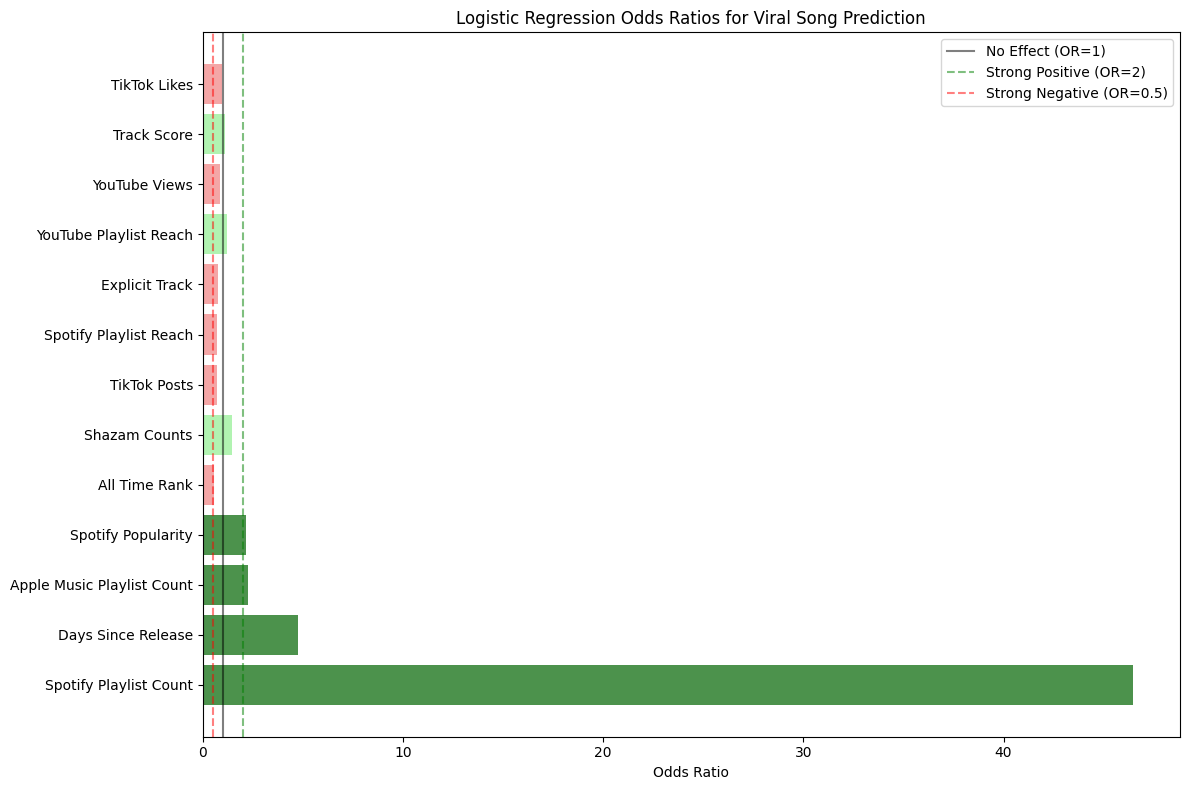

In [55]:
# Get feature coefficients and convert to odds ratios
feature_names = X.columns
lr_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Odds_Ratio': np.exp(lr_model.coef_[0]),
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("LOGISTIC REGRESSION COEFFICIENTS AND ODDS RATIOS")
print("="*60)
print(f"{'Feature':<30} {'Coefficient':<12} {'Odds Ratio':<12} {'Interpretation'}")
print("-" * 80)

for _, row in lr_coefficients.iterrows():
    feature = row['Feature'][:29]
    coef = f"{row['Coefficient']:.4f}"
    odds_ratio = f"{row['Odds_Ratio']:.4f}"
    
    # Interpretation of odds ratio
    if row['Odds_Ratio'] > 1:
        if row['Odds_Ratio'] > 2:
            interpretation = f"Strong +"
        else:
            interpretation = f"Moderate +"
    elif row['Odds_Ratio'] < 1:
        if row['Odds_Ratio'] < 0.5:
            interpretation = f"Strong -"
        else:
            interpretation = f"Moderate -"
    else:
        interpretation = "Neutral"
    
    print(f"{feature:<30} {coef:<12} {odds_ratio:<12} {interpretation}")

print(f"\nOdds Ratio Interpretation:")
print("• > 2.0: Strong positive effect (doubles+ odds of virality)")
print("• 1.0-2.0: Moderate positive effect")  
print("• 0.5-1.0: Moderate negative effect")
print("• < 0.5: Strong negative effect (halves+ odds of virality)")
print("• = 1.0: No effect on viral probability")

# Plot odds ratios
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(lr_coefficients))

# Color code based on effect direction and strength
colors = []
for odds_ratio in lr_coefficients['Odds_Ratio']:
    if odds_ratio > 2:
        colors.append('darkgreen')
    elif odds_ratio > 1:
        colors.append('lightgreen')
    elif odds_ratio > 0.5:
        colors.append('lightcoral')
    else:
        colors.append('darkred')

plt.barh(y_pos, lr_coefficients['Odds_Ratio'], color=colors, alpha=0.7)
plt.yticks(y_pos, lr_coefficients['Feature'])
plt.xlabel('Odds Ratio')
plt.title('Logistic Regression Odds Ratios for Viral Song Prediction')
plt.axvline(x=1, color='black', linestyle='-', alpha=0.5, label='No Effect (OR=1)')
plt.axvline(x=2, color='green', linestyle='--', alpha=0.5, label='Strong Positive (OR=2)')
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Strong Negative (OR=0.5)')
plt.legend()
plt.tight_layout()
plt.show()

### 7.2 Random Forest Feature Importance


RANDOM FOREST FEATURE IMPORTANCE
                       Feature  Importance
0       Spotify Playlist Count    0.282107
10          Days Since Release    0.138274
1       Spotify Playlist Reach    0.126687
8                Shazam Counts    0.116225
6   Apple Music Playlist Count    0.081361
3                YouTube Views    0.068342
2           Spotify Popularity    0.057146
5                 TikTok Likes    0.029075
9                  Track Score    0.027237
12               All Time Rank    0.025405
4                 TikTok Posts    0.024090
7       YouTube Playlist Reach    0.019772
11              Explicit Track    0.004279


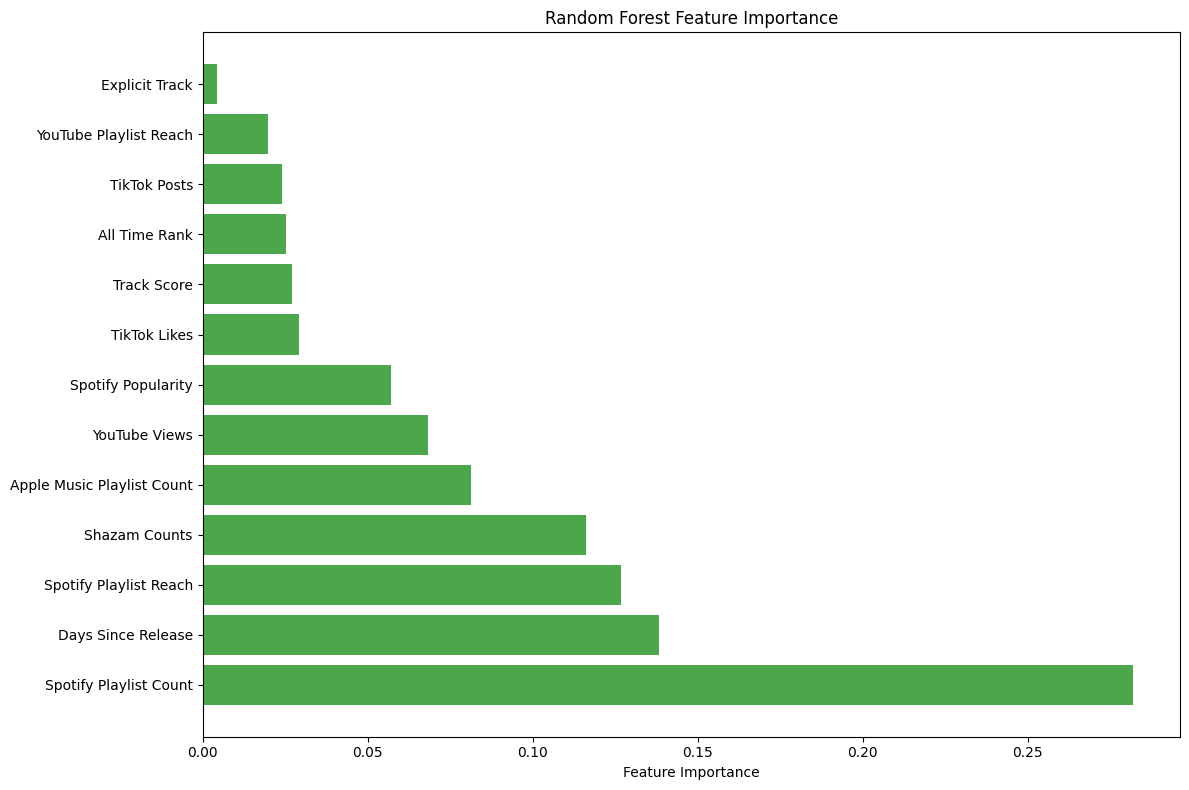

In [56]:
# Get feature importance
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRANDOM FOREST FEATURE IMPORTANCE")
print("="*40)
print(rf_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(rf_importance))
plt.barh(y_pos, rf_importance['Importance'], color='green', alpha=0.7)
plt.yticks(y_pos, rf_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

### 7.3 ROC Curves Comparison

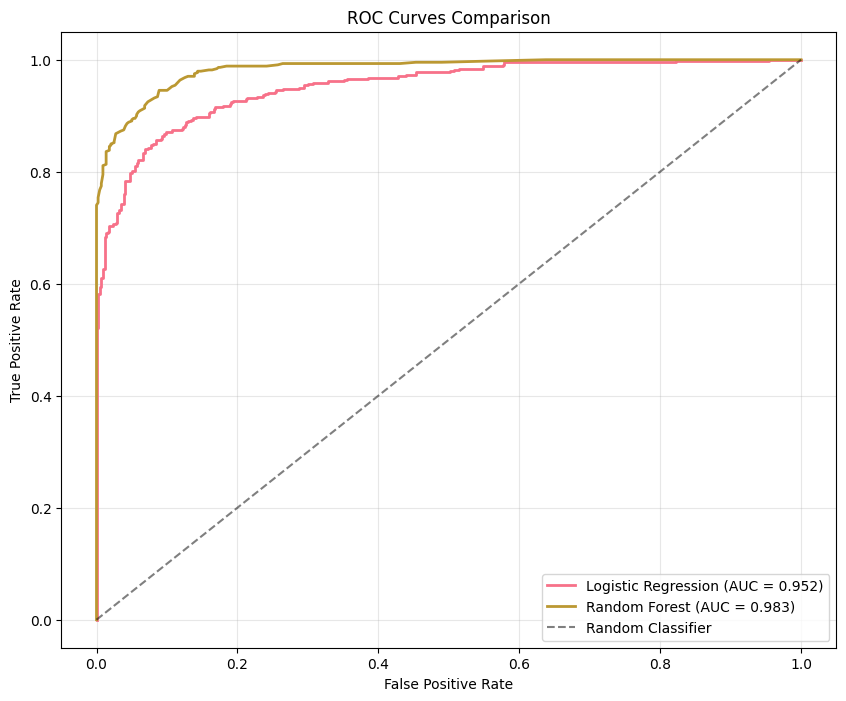

In [57]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_prob)
auc_lr = roc_auc_score(y_test, lr_test_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_prob)
auc_rf = roc_auc_score(y_test, rf_test_prob)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 8. Results Analysis and Insights

**Model Performance Summary**: Our predictive models successfully identify viral songs based on accumulated engagement patterns and time since release. Both models demonstrate strong performance in distinguishing songs that achieved mega-hit status (>240M streams) from those that remained highly successful but non-viral.

### 8.1 Model Performance Summary

In [58]:
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"{'Metric':<20} {'Logistic Reg':<15} {'Random Forest':<15}")
print("-" * 50)
print(f"{'Test Accuracy':<20} {lr_model.score(X_test_scaled, y_test):<15.3f} {rf_model.score(X_test, y_test):<15.3f}")
print(f"{'Test AUC':<20} {roc_auc_score(y_test, lr_test_prob):<15.3f} {roc_auc_score(y_test, rf_test_prob):<15.3f}")
print(f"{'CV AUC (mean)':<20} {cv_scores_lr.mean():<15.3f} {cv_scores_rf.mean():<15.3f}")

MODEL PERFORMANCE SUMMARY
Metric               Logistic Reg    Random Forest  
--------------------------------------------------
Test Accuracy        0.883           0.921          
Test AUC             0.952           0.983          
CV AUC (mean)        0.956           0.980          


### 8.2 Top Viral Songs Analysis

In [59]:
# Analyze top viral songs
top_viral = df[df['viral'] == 1].nlargest(10, 'Spotify Streams')
print("\nTOP 10 MOST VIRAL SONGS")
print("="*60)
display_cols = ['Track', 'Artist', 'Spotify Streams', 'Spotify Popularity', 'Days Since Release']
for i, (_, row) in enumerate(top_viral[display_cols].iterrows(), 1):
    print(f"{i:2d}. {row['Track']} - {row['Artist']}")
    print(f"    Streams: {row['Spotify Streams']:,} | Popularity: {row['Spotify Popularity']:.1f} | Days: {row['Days Since Release']:.0f}")
    print()


TOP 10 MOST VIRAL SONGS
 1. Blinding Lights - The Weeknd
    Streams: 4,281,468,720.0 | Popularity: 83.0 | Days: 1859

 2. Blinding Lights - xSyborg
    Streams: 4,261,328,190.0 | Popularity: 67.0 | Days: 1389

 3. Shape of You - Ed Sheeran
    Streams: 3,909,458,734.0 | Popularity: 80.0 | Days: 2916

 4. Shape of You - xSyborg
    Streams: 3,888,356,417.0 | Popularity: 67.0 | Days: 1410

 5. Someone You Loved - Lewis Capaldi
    Streams: 3,427,498,835.0 | Popularity: 82.0 | Days: 2245

 6. Sunflower - Spider-Man: Into the Spider-Verse - Post Malone
    Streams: 3,358,704,125.0 | Popularity: 79.0 | Days: 2266

 7. As It Was - Harry Styles
    Streams: 3,301,814,535.0 | Popularity: 87.0 | Days: 1006

 8. Starboy - The Weeknd
    Streams: 3,291,262,413.0 | Popularity: 84.0 | Days: 3022

 9. One Dance - Drake
    Streams: 3,192,204,066.0 | Popularity: 82.0 | Days: 3193

10. STAY (with Justin Bieber) - The Kid LAROI
    Streams: 3,107,100,349.0 | Popularity: 78.0 | Days: 1271



### 8.3 Key Insights

In [60]:
print("\nKEY INSIGHTS")
print("="*30)

# Top 3 most important features from each model
top_lr_features = lr_coefficients.head(3)['Feature'].tolist()
top_rf_features = rf_importance.head(3)['Feature'].tolist()

print("Top 3 Features - Logistic Regression:")
for i, feature in enumerate(top_lr_features, 1):
    coef = lr_coefficients[lr_coefficients['Feature'] == feature]['Coefficient'].iloc[0]
    direction = "increases" if coef > 0 else "decreases"
    print(f"  {i}. {feature} - {direction} viral probability")

print("\nTop 3 Features - Random Forest:")
for i, feature in enumerate(top_rf_features, 1):
    importance = rf_importance[rf_importance['Feature'] == feature]['Importance'].iloc[0]
    print(f"  {i}. {feature} - importance: {importance:.3f}")

# Additional insights
print(f"\nDataset Overview:")
print(f"Total songs analyzed: {len(X):,}")
print(f"Viral threshold (median streams): {median_streams:,.0f}")
print(f"Average streams for viral songs: {df[df['viral']==1]['Spotify Streams'].mean():,.0f}")
print(f"Average streams for non-viral songs: {df[df['viral']==0]['Spotify Streams'].mean():,.0f}")


KEY INSIGHTS
Top 3 Features - Logistic Regression:
  1. Spotify Playlist Count - increases viral probability
  2. Days Since Release - increases viral probability
  3. Apple Music Playlist Count - increases viral probability

Top 3 Features - Random Forest:
  1. Spotify Playlist Count - importance: 0.282
  2. Days Since Release - importance: 0.138
  3. Spotify Playlist Reach - importance: 0.127

Dataset Overview:
Total songs analyzed: 4,389
Viral threshold (median streams): 231,981,539
Average streams for viral songs: 783,768,801
Average streams for non-viral songs: 83,450,671
